# Analyzing Vogue Channel Statistics

## Introduction

Online platforms have played a significant role in shaping trends and influencing consumer choices. Among these platforms, YouTube has emerged as a powerful tool for fashion creators to showcase their talent, share style tips, and build an audience. In this project, we delve into the world of fashion by analyzing the channel statistics of Vogue, one of the most renowned fashion publications.

## Objective
By examining various metrics and data related to Vogue's YouTube channel, we aim to uncover patterns, trends, and key factors contributing to their online success. For this, we will be using YouTube API to retrieve channel statistics for different Vogue channels across the world. 

## Data Extraction

The first step to retrieve the data from the various Vogue channels, is to use the information already provided by YoutTube on Data API. This makes it easier since it serves as a guide to request YouTube data.

Part of this meant to use my API key to gain access to this data.

In [1]:
# required package in order to use YouTube API
from googleapiclient.discovery import build

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import JSON

In [2]:
api_key = '...'
channel_ids = ['UCZ8TREbPfawhSvayVe5pqKg', #British Vogue
              'UCn1qbwd476aiRH9d8RT5D0Q', #Vogue Japan
              'UCLBMjQDJ5r8kbTrN1kev4dw', #Vogue Mexico y Latinoamerica
              'UCh29s-RNWI6z63670hUv71Q', #Vogue India
              'UCnTU3MvOqhKclQ6OpnsY87Q' #Vogue Australia
              ]

api_service_name = "youtube"
api_version = "v3"
youtube = build(api_service_name, api_version, developerKey=api_key)


We are using some of the code already provided by Youtube Data API. However, since we are working with multiple Vogue channels, we want to retreive information from more than one source. This means we need to create a function to do that for us and why we imported the JSON function to be able to read the response that we get.

Since the response contains all the info we want to use for this project and we are reviewing multiple channels, we essentially need to create a for loop so that we request the same items from the response for each Vogue channel. It is essential that we request the playlist id so that we can get all the video id's from the channel later on in our analysis. This way we can analyze the videos for a specific channel in more detail. 

Once we extract all the data we want from each channel, we can store this in a dictionary to use it for later. In this case we would end up with 5 dictionaries for the 5 channels we will be looking at. 

In [3]:
def scrape_channel(youtube, channel_ids):
    all_data = []
    request = youtube.channels().list(
                part = 'snippet, contentDetails, statistics', 
                id = ','.join(channel_ids))
    
    response = request.execute()
    #looping through items
    for i in range(len(response['items'])):
        data = dict(Channel_name = response['items'][i]['snippet']['title'],
                   Subscribers = response['items'][i]['statistics']['subscriberCount'],
                   Views = response['items'][i]['statistics']['viewCount'],
                   Total_Videos = response['items'][i]['statistics']['videoCount'],
                   playlist_id = response['items'][i]['contentDetails']['relatedPlaylists']['uploads'])
        all_data.append(data)

    return pd.DataFrame(all_data)


In [4]:
channel_statistics = scrape_channel(youtube, channel_ids)

In [5]:
channel_statistics

,Channel_name,Subscribers,Views,Total_Videos,playlist_id
0,British Vogue,1430000,367802010,736,UUZ8TREbPfawhSvayVe5pqKg
1,Vogue Australia,118000,34232006,540,UUnTU3MvOqhKclQ6OpnsY87Q
2,VOGUE JAPAN,1100000,401541503,1510,UUn1qbwd476aiRH9d8RT5D0Q
3,Vogue México y Latinoamérica,700000,131344280,1152,UULBMjQDJ5r8kbTrN1kev4dw
4,VOGUE India,613000,183611466,1159,UUh29s-RNWI6z63670hUv71Q


In [6]:
# checking data types of our variables so we'll be able to use for analysis
channel_statistics['Subscribers'] = pd.to_numeric(channel_statistics['Subscribers'])
channel_statistics['Views'] = pd.to_numeric(channel_statistics['Views'])
channel_statistics['Total_Videos'] = pd.to_numeric(channel_statistics['Total_Videos'])
channel_statistics.dtypes

Channel_name    object
Subscribers      int64
Views            int64
Total_Videos     int64
playlist_id     object
dtype: object

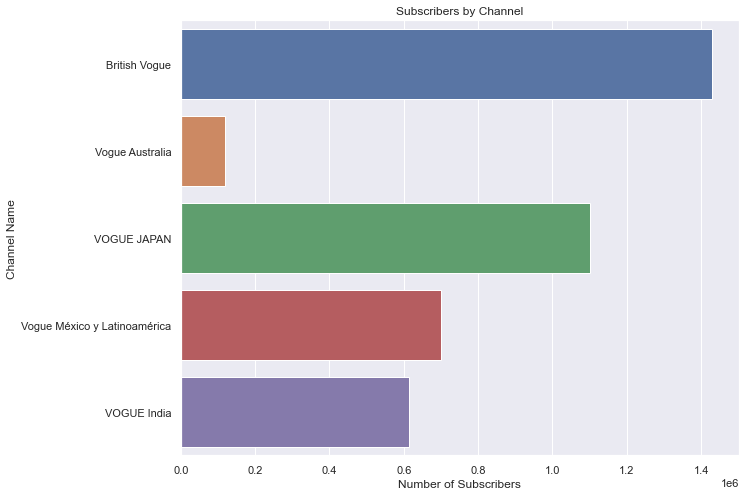

In [7]:
sns.set(rc={'figure.figsize': (10, 8)})
ax = sns.barplot(y='Channel_name', x='Subscribers', data=channel_statistics)

# Set labels and title
ax.set_ylabel('Channel Name')
ax.set_xlabel('Number of Subscribers')
ax.set_title('Subscribers by Channel')

plt.show()

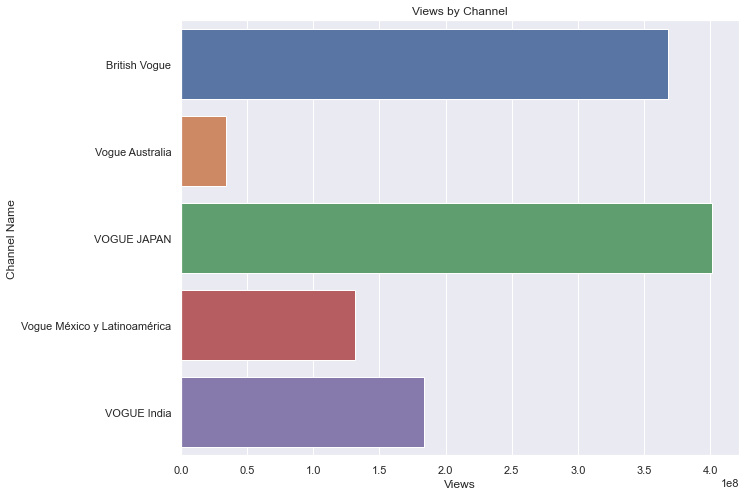

In [8]:
ax = sns.barplot(y = "Channel_name", x = 'Views', data = channel_statistics)
ax.set_ylabel('Channel Name')
ax.set_xlabel('Views')
ax.set_title('Views by Channel')

plt.show()

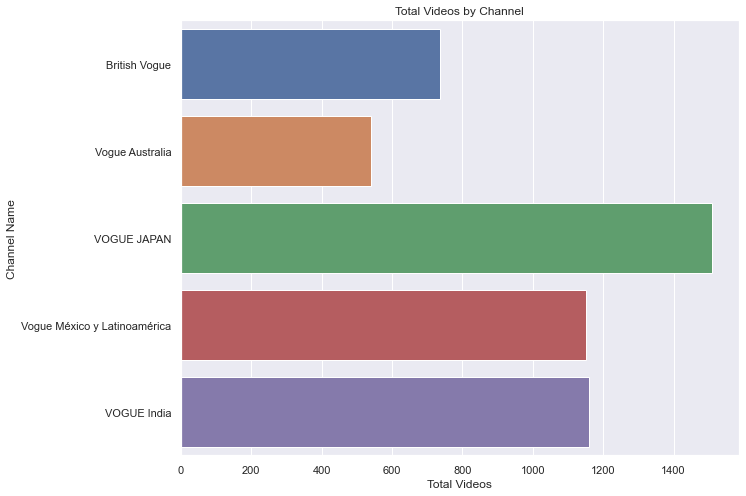

In [9]:
ax = sns.barplot(y = "Channel_name", x = 'Total_Videos', data = channel_statistics)
ax.set_ylabel('Channel Name')
ax.set_xlabel('Total Videos')
ax.set_title('Total Videos by Channel')

plt.show()

## Observation
At first glance, one might expect a strong correlation between the number of subscribers and the number of views. However, the bar plot reveals an interesting pattern. We can see that even though British Vogue has more subscribers than Vogue Japan, the total number of views for the Vogue Japan channel surpasses that of British Vogue. One thing to consider is the amount of videos produced by each Vogue channel which is what the "Total Videos by Channel" bar chart tells us. As we can see, Vogue Japan has the most amount of videos which can explain why it is the channel with the most amount of views. Additonally, the content strategy of each Vogue channel could also contribute to the differences in views. The types of videos produced, their topics, styles, and relevance to the target audience can all have an influence. Vogue Japan's content strategy might resonate more strongly with its viewers, leading to a higher level of engagement and views compared to British Vogue. Furthermore, considering that each channel represents a specific region or country, it's important to recognize that location and cultural preferences can all play a role in viewership. Among all channels, Vogue Australia seems to be the lowest performing form across amount of views, subscribers, and videos. This can be due to the time period in which the Vogue Australia channel was created which means it may be a younger channel. Moreover, its relatively smaller population compared to countries like the United States, India, or Japan can also account for its numbers across these categories. Overall, Vogue Japan and British Vogue seem to be the most popular Vogue channels, with Vogue Japan having higher values for 2/3 of the variables. Thus, it can be considered the most popular out of the 5 channels.

## Function to Get Video ID's

In [10]:
channel_statistics

,Channel_name,Subscribers,Views,Total_Videos,playlist_id
0,British Vogue,1430000,367802010,736,UUZ8TREbPfawhSvayVe5pqKg
1,Vogue Australia,118000,34232006,540,UUnTU3MvOqhKclQ6OpnsY87Q
2,VOGUE JAPAN,1100000,401541503,1510,UUn1qbwd476aiRH9d8RT5D0Q
3,Vogue México y Latinoamérica,700000,131344280,1152,UULBMjQDJ5r8kbTrN1kev4dw
4,VOGUE India,613000,183611466,1159,UUh29s-RNWI6z63670hUv71Q


In [11]:
playlist_id = channel_statistics.loc[channel_statistics['Channel_name'] == 'Vogue México y Latinoamérica', 'playlist_id'].iloc[0]

In [12]:
playlist_id

'UULBMjQDJ5r8kbTrN1kev4dw'

In [13]:
def get_video_ids(youtube, playlist_id):
    
    request = youtube.playlistItems().list(
                part = 'contentDetails',
                playlistId = playlist_id,
                maxResults = 50)
    response = request.execute()
    
    video_ids = []
    
    for i in range(len(response['items'])):
        video_ids.append(response['items'][i]['contentDetails']['videoId'])
        
    next_page_token = response.get('nextPageToken')
    more_pages = True
    
    while more_pages:
        if next_page_token is None:
            more_pages = False
        else: 
            request = youtube.playlistItems().list(
                        part = 'contentDetails',
                        playlistId = playlist_id,
                        maxResults = 50,
                        pageToken = next_page_token)
            response = request.execute()
            
            for i in range(len(response['items'])):
                video_ids.append(response['items'][i]['contentDetails']['videoId'])
            
            next_page_token = response.get('nextPageToken')
        
    return video_ids

We needed to modify the function above to be able to get all video id's since the maxResults paramater can only go up to 50. Nonetheless, from the data above, each Vogue channel definitely has over 50 videos. In order to fix this issue, we can retrieve 50 video id's at a time over and over again until there are no more videos left. This explains the next_page_token parameter defined above.

In [14]:
video_ids = get_video_ids(youtube, playlist_id)

In [15]:
len(video_ids) 

1153

## Function to get video details

In [16]:
def get_video_details(youtube, video_ids):
    all_video_stats = []
    
    for i in range(0, len(video_ids), 50):
        request = youtube.videos().list(
                    part = 'snippet, statistics',
                    id = ','.join(video_ids[i: i + 50]))
        response = request.execute()

        for video in response['items']:
            video_stats = dict(Title = video['snippet']['title'],
                               Published_date = video['snippet']['publishedAt'],
                               Views = video['statistics']['viewCount'],
                               Likes = video['statistics']['likeCount'],
                               Comments = video['statistics']['commentCount']
                              )
            all_video_stats.append(video_stats)
    
    return pd.DataFrame(all_video_stats)

In [17]:
video_details = get_video_details(youtube, video_ids)

In [18]:
video_details

,Title,Published_date,Views,Likes,Comments
0,Sex and the City cumple 25 años,2023-06-27T00:00:24Z,312,20,0
1,Maluma se prepara para el desfile de Louis Vui...,2023-06-26T17:16:42Z,598,43,3
2,Looks para #pride 🏳️‍🌈,2023-06-24T21:00:16Z,689,23,0
3,El secreto de una chica trans 🏳️‍🌈 #pride,2023-06-24T18:00:12Z,1118,41,3
4,Maluma se prepara para el desfile de Louis Vui...,2023-06-23T21:51:44Z,26132,272,16
...,...,...,...,...,...
1148,#EnMexicoCon Paula Mendoza,2015-01-27T15:15:56Z,1305,9,0
1149,Fashion’s Night Out 2014,2014-12-12T17:51:40Z,190,6,0
1150,Felicitaciones Aniversario Vogue 15,2014-10-21T06:06:33Z,363,10,0
1151,Luxury day by Land Rover,2014-09-05T14:06:19Z,336,9,1


In [19]:
video_details['Published_date'] = pd.to_datetime(video_details['Published_date']).dt.date
video_details['Views'] = pd.to_numeric(video_details['Views'])
video_details['Likes'] = pd.to_numeric(video_details['Likes'])
video_details['Comments'] = pd.to_numeric(video_details['Comments'])
video_details

,Title,Published_date,Views,Likes,Comments
0,Sex and the City cumple 25 años,2023-06-27,312,20,0
1,Maluma se prepara para el desfile de Louis Vui...,2023-06-26,598,43,3
2,Looks para #pride 🏳️‍🌈,2023-06-24,689,23,0
3,El secreto de una chica trans 🏳️‍🌈 #pride,2023-06-24,1118,41,3
4,Maluma se prepara para el desfile de Louis Vui...,2023-06-23,26132,272,16
...,...,...,...,...,...
1148,#EnMexicoCon Paula Mendoza,2015-01-27,1305,9,0
1149,Fashion’s Night Out 2014,2014-12-12,190,6,0
1150,Felicitaciones Aniversario Vogue 15,2014-10-21,363,10,0
1151,Luxury day by Land Rover,2014-09-05,336,9,1


In [20]:
video_details.isnull().any()

Title             False
Published_date    False
Views             False
Likes             False
Comments          False
dtype: bool

## What are the best performing videos for Vogue Mexico y Latinoamerica?

In [21]:
top10_videos = video_details.sort_values(by = 'Views', ascending = False).head(10)


In [22]:
top10_videos

,Title,Published_date,Views,Likes,Comments
345,Salma Hayek y su hija Valentina Paloma cuentan...,2022-05-09,8942816,206814,8718
465,Anya Taylor-Joy hablando español y lo que hay ...,2021-09-17,4389080,222520,6493
531,La guía de Rosalía para un maquillaje de veran...,2021-06-11,2953117,100752,1911
43,Salma Hayek fue la mejor vestida de Cannes 1999,2023-05-17,2149052,129843,1143
631,Doja Cat muestra cómo conseguir un look de e-g...,2021-01-24,2112761,111748,1723
573,Alexa Demie es una experta en maquillaje de lo...,2021-04-14,2024442,94858,633
401,Eiza González confiesa TODO lo que guarda en s...,2022-01-26,1979377,63177,1933
513,Nicki Nicole muestra cómo le saca partido a su...,2021-07-07,1907490,107331,1939
85,Salma Hayek en la MET Gala 2023 con un vestido...,2023-05-02,1693849,55009,1235
478,María Becerra y la guía para cejas perfectas |...,2021-09-06,1689438,79998,2006


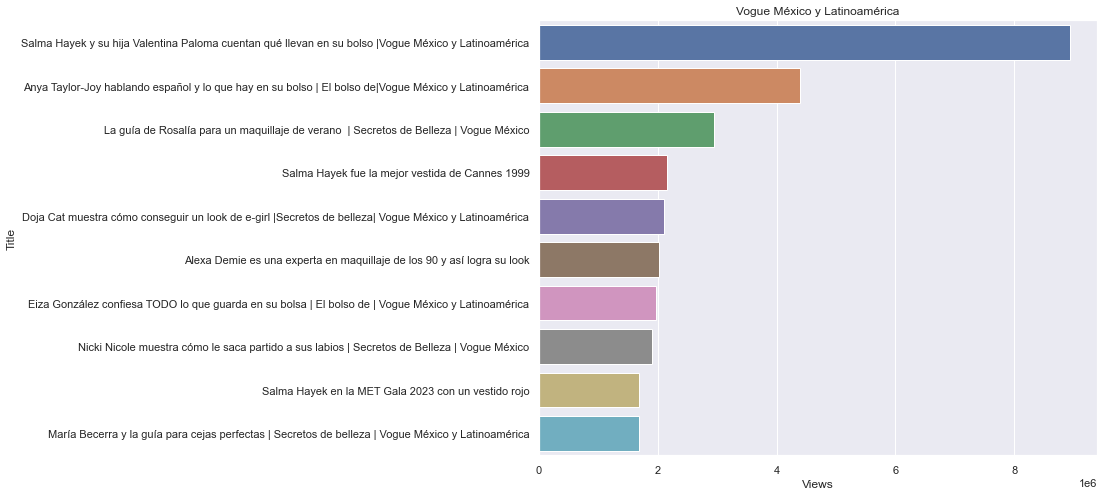

In [23]:
ax1 = sns.barplot(x = 'Views', y = "Title", data = top10_videos)
plt.title('Vogue México y Latinoamérica')
plt.show()

## Observation
Among the best performing videos, measured by views, Salma Hayek is a reappearing figure. Her name is also part of one with less success. This can be due to the duration of the video since many people would prefer to watch longer videos of the actress to get to learn more about her than a shorter video where they may not engage much.   

## What season gives us the highest number of videos?

First we need to reorganize our data so that it'll be easier to interpret. We can sort the months in a specific order by creating a list of our own with the months.

In [24]:
video_details['Month'] = pd.to_datetime(video_details['Published_date']).dt.strftime('%b')

In [25]:
video_details

,Title,Published_date,Views,Likes,Comments,Month
0,Sex and the City cumple 25 años,2023-06-27,312,20,0,Jun
1,Maluma se prepara para el desfile de Louis Vui...,2023-06-26,598,43,3,Jun
2,Looks para #pride 🏳️‍🌈,2023-06-24,689,23,0,Jun
3,El secreto de una chica trans 🏳️‍🌈 #pride,2023-06-24,1118,41,3,Jun
4,Maluma se prepara para el desfile de Louis Vui...,2023-06-23,26132,272,16,Jun
...,...,...,...,...,...,...
1148,#EnMexicoCon Paula Mendoza,2015-01-27,1305,9,0,Jan
1149,Fashion’s Night Out 2014,2014-12-12,190,6,0,Dec
1150,Felicitaciones Aniversario Vogue 15,2014-10-21,363,10,0,Oct
1151,Luxury day by Land Rover,2014-09-05,336,9,1,Sep


In [26]:
videos_per_month = video_details.groupby('Month', as_index = False).size()

In [27]:
videos_per_month

,Month,size
0,Apr,87
1,Aug,94
2,Dec,100
3,Feb,77
4,Jan,83
5,Jul,73
6,Jun,86
7,Mar,88
8,May,146
9,Nov,98


In [28]:
sort_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
              'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [29]:
videos_per_month.index = pd.CategoricalIndex(videos_per_month['Month'], categories = sort_order, ordered = True)

In [30]:
videos_per_month = videos_per_month.sort_index()

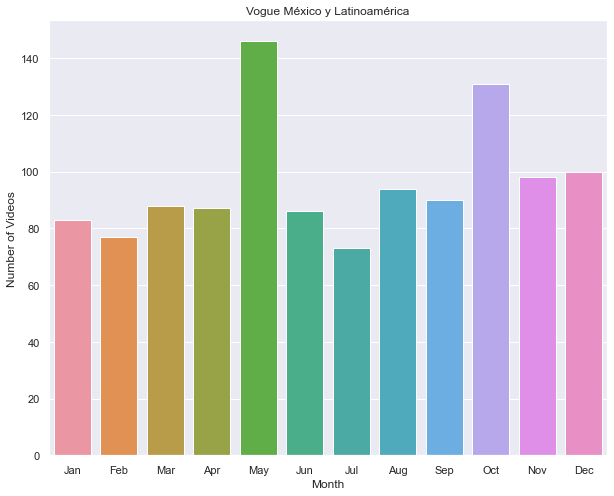

In [31]:
ax2 = sns.barplot(x = 'Month', y = 'size', data = videos_per_month)
plt.ylabel('Number of Videos')
plt.title('Vogue México y Latinoamérica')
plt.show()

## Observation
From the bar chart, Vogue México y Latinoamérica produced the most amount of videos in the months of May and October. This observation suggests that there might have been special events, promotions, or content releases during those months that led to increased video production. In fact, May and October might correspond to seasons or events that are particularly relevant to the fashion industry. For example, May could be associated with spring fashion collections or fashion weeks, while October might be linked to fall/winter collections.

## What is the relationship between views, likes, and comments?

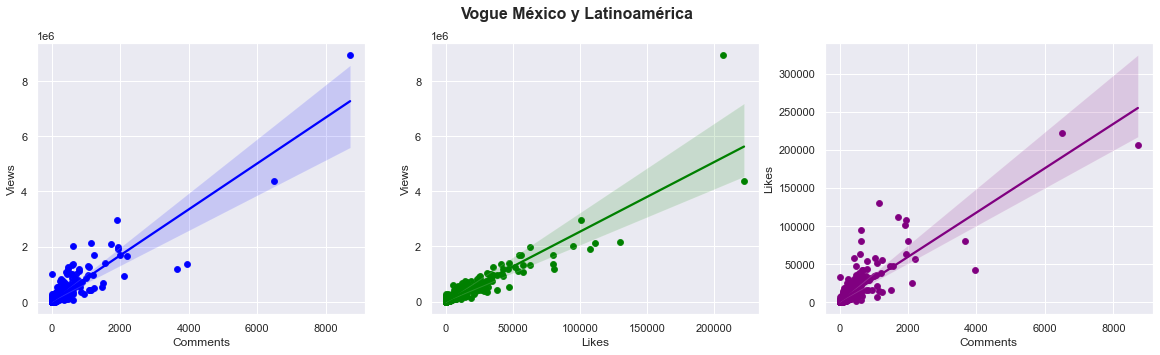

In [44]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

sns.scatterplot(data = video_details, x = 'Comments', y = 'Views', ax = ax[0], color = 'blue')
sns.regplot(data=video_details, x='Comments', y='Views', ax=ax[0], color='blue')

sns.scatterplot(data = video_details, x = 'Likes', y = 'Views', ax = ax[1], color = 'green')
sns.regplot(data=video_details, x='Likes', y='Views', ax=ax[1], color='green')

sns.scatterplot(data = video_details, x = 'Comments', y = 'Likes', ax = ax[2], color = 'purple')
sns.regplot(data=video_details, x='Comments', y='Likes', ax=ax[2], color='purple')

plt.suptitle('Vogue México y Latinoamérica', fontsize=16, fontweight='bold')

plt.show()

## Observation

We can definitely see a positive correlation among all three of these comparisons. Intuitively, this makes sense since a high number of likes on a video is indicative of higher popularity, leading to more views for that video. The same logic applies to views vs. comments. The strongest correlation seems to be likes vs. comments. This observation indicates that user engagement, in the form of both likes and comments, is closely linked. When a video receives a high number of likes, it often indicates that viewers find the content engaging or enjoyable. This positive response may encourage viewers to leave comments expressing their thoughts, opinions, or reactions to the video. Additionally, videos that generate a lot of discussion through comments may attract more attention from viewers, leading to a higher number of likes.

There are some other factors we need to consider. Our analysis focuses on quantitative metrics (views, likes, and comments), but it may not capture the full context of the videos and their content. Qualitative factors such as video quality, creativity, relevance, and audience preferences are not considered which probably have a significant influence on the views and comments certain videos get.

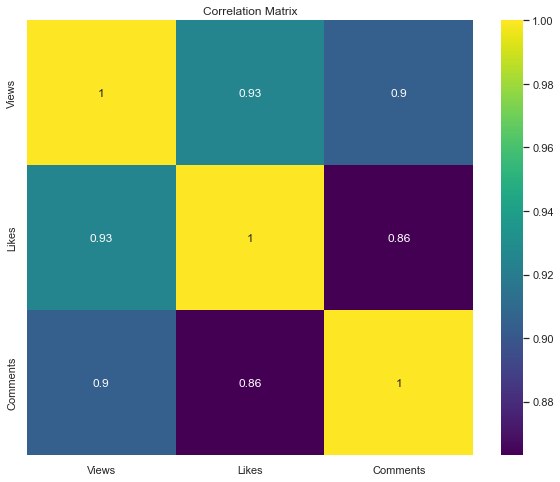

In [42]:
# Using the 'method' parameter to specify the correlation method
correlation_matrix = video_details.corr(method='pearson')  # Pearson correlation coefficient (default)

sns.heatmap(correlation_matrix, annot=True, cmap='viridis')

# Set the title of the heatmap
plt.title('Correlation Matrix')

# Display the heatmap
plt.show()

## Observation

Although it seems that the correlation between likes and comments seemed to be the highest from the scatter plot, a closer analysis using the correlation matrix tells us that the highest correlation is actually between views and likes. This discrepancy emphasizes the importance of considering multiple data visualization techniques and statistical analyses to gain a better understanding of the relationships between variables. In fact, the scale of the variables in the plots can lead to misinterpretations of the data. We see that views is on a much larger scale than likes which makes it seem that the 'Views vs. Likes' scatter plot has a line of best fit that has a slightly less positive slope than 'Likes vs. Comments'. 

## Conclusion

While our data analysis provides valuable insights into Vogue channels, it is important to acknowledge some limitations. First, our analysis relies on data obtained from the YouTube Data API, which is subject to potential inaccuracies in the data provided by the API itself. Variations in data reporting, potential delays in updating information for each Vogue channel, or discrepancies in subscriber counts could introduce some level of uncertainty. Furthermore, factors such as the quality of content, audience demographics, and external influences are not explicitly accounted for in our analysis. Also, our analysis focuses on a specific set of Vogue channels and does not encompass the entire Vogue brand or other related social media platforms.

Additionally, it would have been interesting to analyze data on the audience of these channels. For example, the age group that tends to interact the most with Vogue's content, which is fashion and beauty focused. 

Of course, our analysis is based on a snapshot of data within a specific timeframe. The performance and dynamics of Vogue channels are subject to change, so our findings may not capture long-term trends in the channels' strategies or audience behavior.
